In [2]:
# Load libraries
library(foreign)
library(car)
library(plm)
library(gplots)

Loading required package: carData

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [21]:
# Load data
Panel <- read.dta("http://dss.princeton.edu/training/Panel101.dta")
head(Panel)

country,year,y,y_bin,x1,x2,x3,opinion
A,1990,1342787840,1,0.2779036,-1.1079559,0.28255358,Str agree
A,1991,-1899660544,0,0.3206847,-0.9487200,0.49253848,Disag
A,1992,-11234363,0,0.3634657,-0.7894840,0.70252335,Disag
A,1993,2645775360,1,0.2461440,-0.8855330,-0.09439092,Disag
A,1994,3008334848,1,0.4246230,-0.7297683,0.94613063,Disag
A,1995,3229574144,1,0.4772141,-0.7232460,1.02968037,Str agree


### Exploring Panel Data

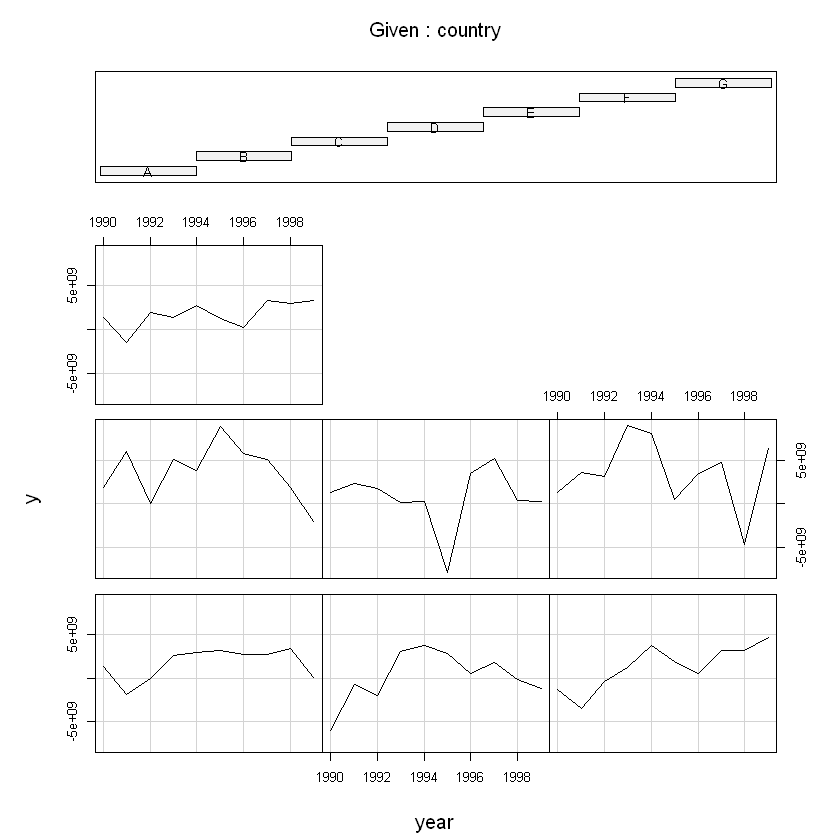

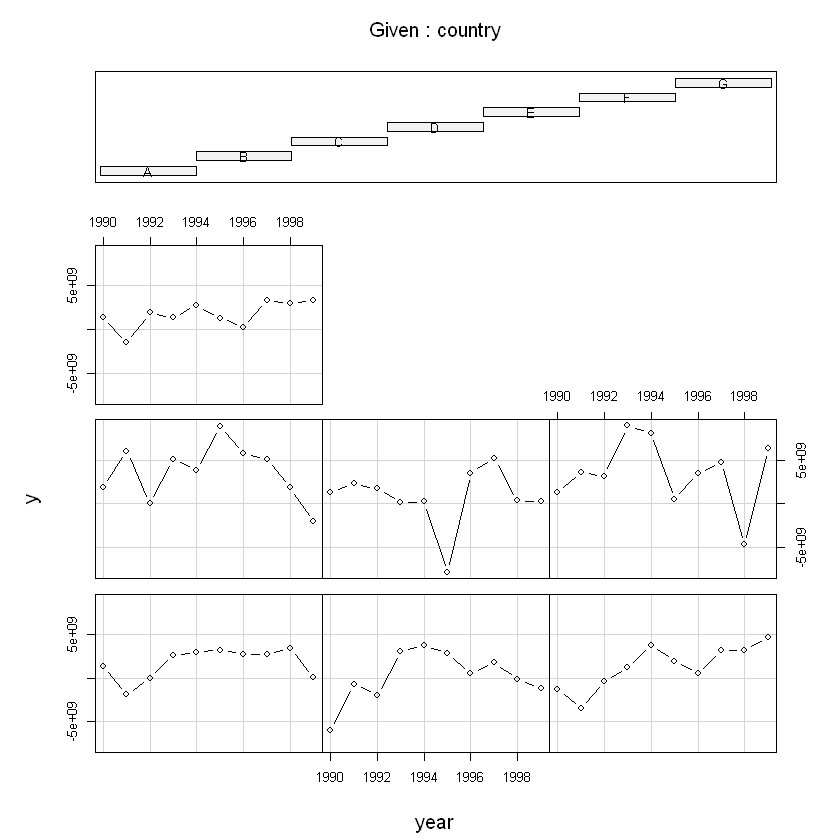

In [3]:
coplot(y~year|country, type='l', data=Panel)
coplot(y~year|country, type='b', data=Panel)

#### Heterogenity across countries

[1] "46" "62"

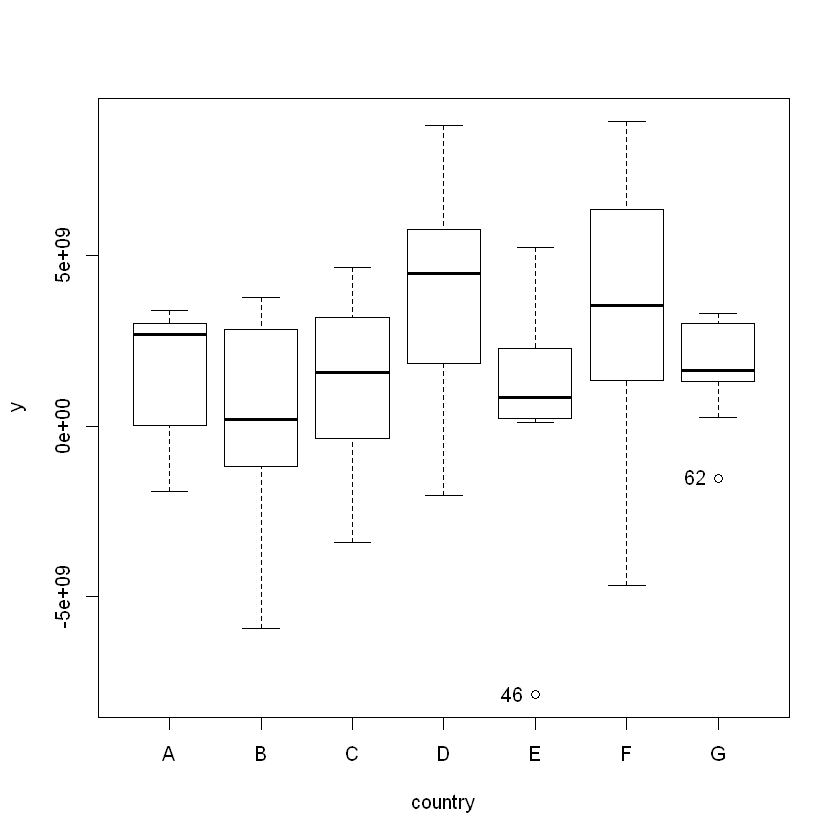

In [5]:
scatterplot(y~country, boxplots=T, smooth=T, reg.line=F, data=Panel)

#### Heterogenity across years

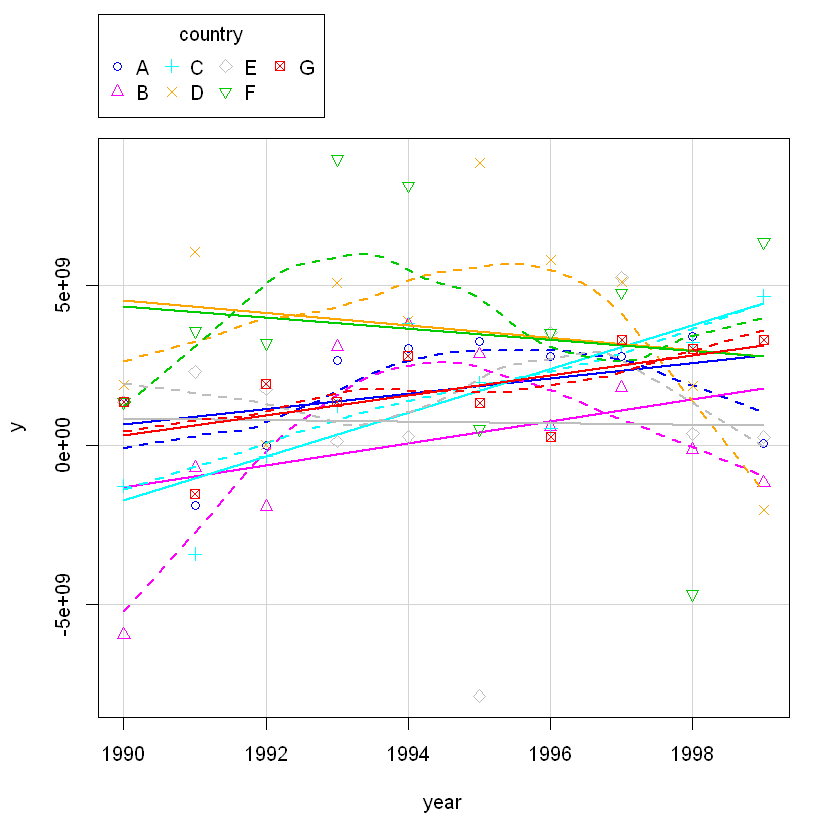

In [4]:
scatterplot(y~year|country, boxplots=F, smooth=T, data=Panel)

#### Fixed effects: Heterogeneity across countries (or entities)

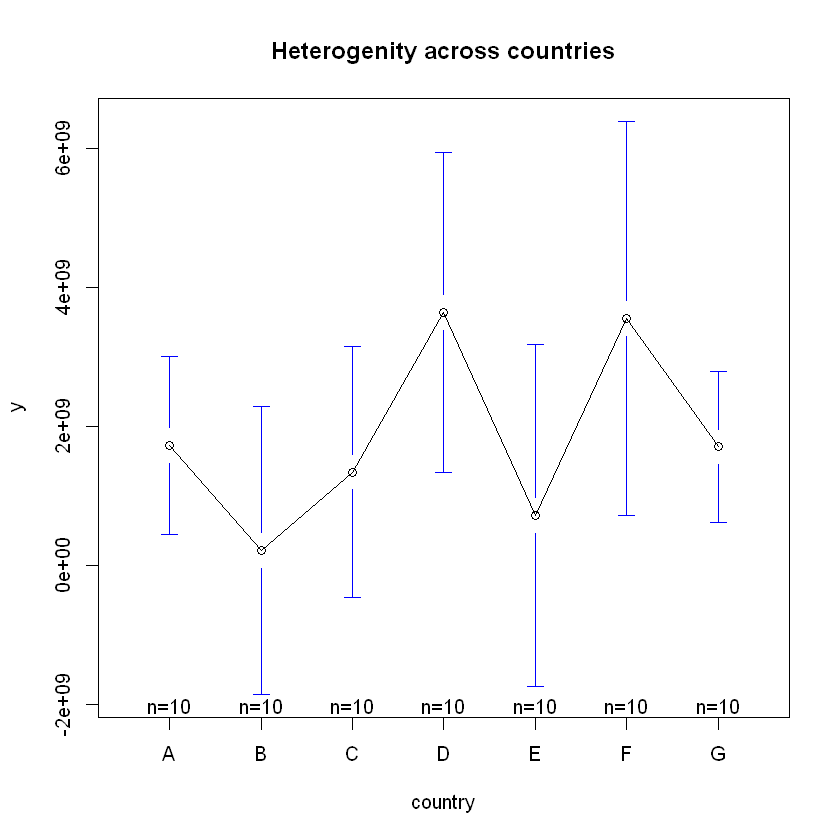

In [6]:
plotmeans(y~country, main='Heterogenity across countries', data=Panel)

#### Fixed effects: Heterogeneity across years 

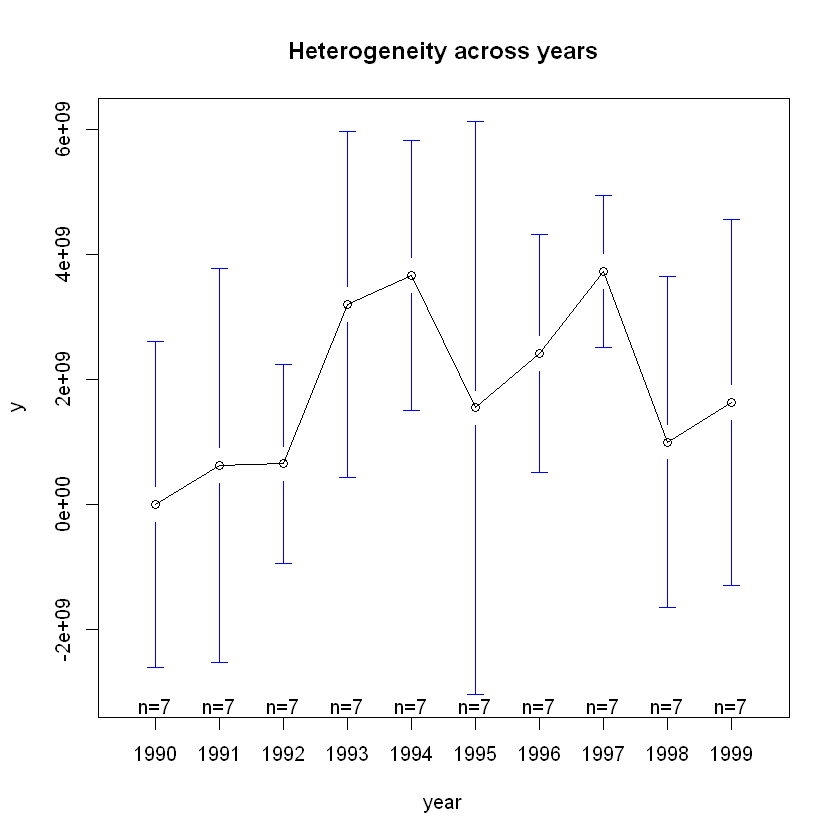

In [7]:
plotmeans(y~year, main='Heterogeneity across years', data=Panel)

### OLS regression


Call:
lm(formula = y ~ x1, data = Panel)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.546e+09 -1.578e+09  1.554e+08  1.422e+09  7.183e+09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.524e+09  6.211e+08   2.454   0.0167 *
x1          4.950e+08  7.789e+08   0.636   0.5272  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.028e+09 on 68 degrees of freedom
Multiple R-squared:  0.005905,	Adjusted R-squared:  -0.008714 
F-statistic: 0.4039 on 1 and 68 DF,  p-value: 0.5272


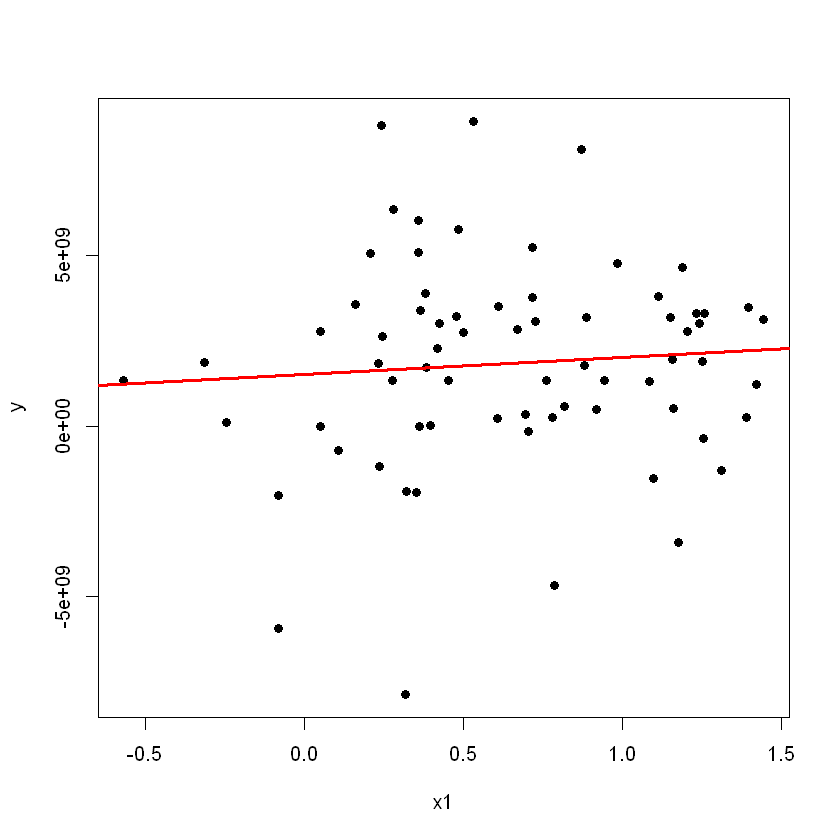

In [9]:
# Regular OLS regression does not consider heterogeneity across groups or time (Simpson Paradox)
ols <- lm(y~x1, data=Panel)
warnings(ols)
summary(ols)

yhat <- ols$fitted

plot(Panel$x1, Panel$y, pch=19, xlab = 'x1', ylab = 'y')
abline(ols, lwd=3, col='red')

### Fixed effects using Least squares dummy variable model


Call:
lm(formula = y ~ x1 + factor(country) - 1, data = Panel)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.634e+09 -9.697e+08  5.405e+08  1.386e+09  5.612e+09 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
x1                2.476e+09  1.107e+09   2.237  0.02889 *  
factor(country)A  8.805e+08  9.618e+08   0.916  0.36347    
factor(country)B -1.058e+09  1.051e+09  -1.006  0.31811    
factor(country)C -1.723e+09  1.632e+09  -1.056  0.29508    
factor(country)D  3.163e+09  9.095e+08   3.478  0.00093 ***
factor(country)E -6.026e+08  1.064e+09  -0.566  0.57329    
factor(country)F  2.011e+09  1.123e+09   1.791  0.07821 .  
factor(country)G -9.847e+08  1.493e+09  -0.660  0.51190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.796e+09 on 62 degrees of freedom
Multiple R-squared:  0.4402,	Adjusted R-squared:  0.368 
F-statistic: 6.095 on 8 and 62 DF,  p-value: 8.892e-06


Warning message in smoother(.x[subs], .y[subs], col = col[i], log.x = logged("x"), :
"could not fit smooth"

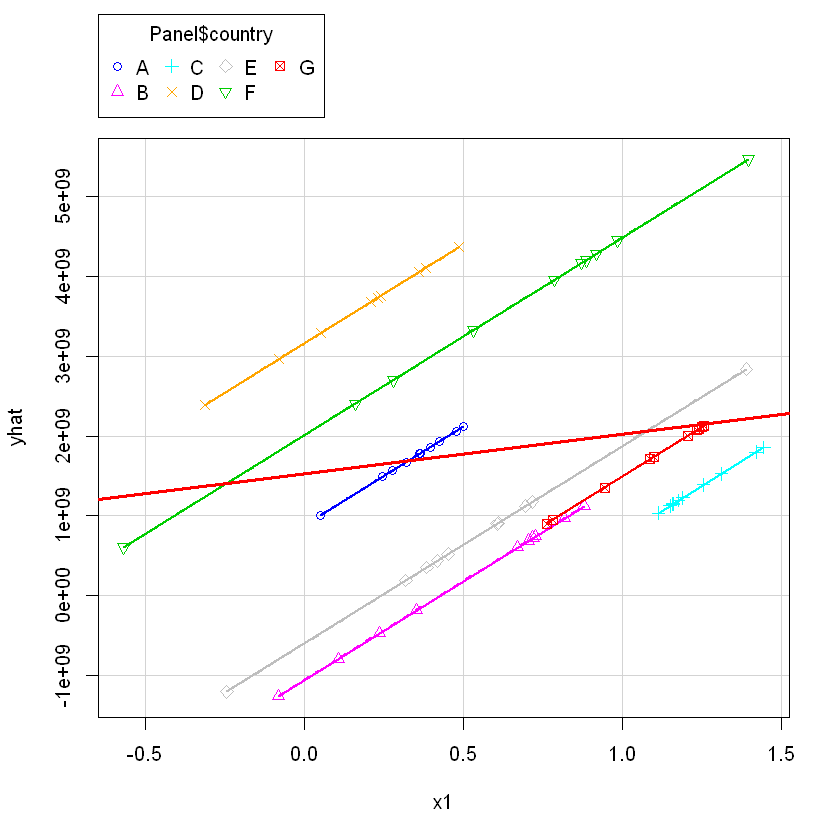

In [10]:
fixed.dum <- lm(y~x1+factor(country)-1,data=Panel)
summary(fixed.dum)

# Comparison plot of LSDV and pooled OLS
yhat <- fixed.dum$fitted

scatterplot(yhat~Panel$x1|Panel$country, xlab='x1',ylab='yhat') # graph (11)
abline(ols, lwd=3, col='red')

### Fixed effects: n entity-specific intercepts (using plm)

In [11]:
fixed <- plm(y~x1, data = Panel, index=c('country','year'), model='within')
summary(fixed)

# Display the fixed effects (constants for each country)
fixef(fixed) # see the graph (11) above, D is the highest and C is the lowest

# Check whether the assumption of country unobserved heterogeineity is correct (fixed vs ols)
pFtest(fixed,ols)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1, data = Panel, model = "within", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.63e+09 -9.70e+08  5.40e+08  0.00e+00  1.39e+09  5.61e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2475617827 1106675594   2.237  0.02889 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.8454e+20
R-Squared:      0.074684
Adj. R-Squared: -0.029788
F-statistic: 5.00411 on 1 and 62 DF, p-value: 0.028892

A           B           C           D           E           F 
  880542404 -1057858363 -1722810755  3162826897  -602622000  2010731793 
          G 
 -984717493


	F test for individual effects

data:  y ~ x1
F = 2.9655, df1 = 6, df2 = 62, p-value = 0.01307
alternative hypothesis: significant effects


### Random effects (using plm)

In [15]:
random <- plm(y~x1, data=Panel, index=c('country','year'), model='random')
summary(random)

# Setting as panel data (an alternative way to run the above model
Panel.set <- pdata.frame(Panel, index=c('country', 'year'))

# Random effects using panel setting (same output as above)
random.set <- plm(y~x1, data=Panel.set, model='random')
summary(random.set)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = Panel, model = "random", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.065e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)
(Intercept) 1037014284  790626206  1.3116   0.1896
x1          1247001782  902145601  1.3823   0.1669

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.02733
Adj. R-Squared: 0.013026
Chisq: 1.91065 on 1 DF, p-value: 0.16689

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = Panel.set, model = "random")

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.065e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)
(Intercept) 1037014284  790626206  1.3116   0.1896
x1          1247001782  902145601  1.3823   0.1669

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.02733
Adj. R-Squared: 0.013026
Chisq: 1.91065 on 1 DF, p-value: 0.16689

###  Fixed or Random: Hausman test

In [16]:
phtest(fixed, random)


	Hausman Test

data:  y ~ x1
chisq = 3.674, df = 1, p-value = 0.05527
alternative hypothesis: one model is inconsistent


It is recommended to use RE for this dataset

### Testing for time-fixed effects

In [19]:
fixed.time <- plm(y~x1 + factor(year), data=Panel, index=c('country', 'year'), model='within')
summary(fixed.time)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1 + factor(year), data = Panel, model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.92e+09 -1.05e+09 -1.40e+08  0.00e+00  1.63e+09  5.49e+09 

Coefficients:
                   Estimate Std. Error t-value Pr(>|t|)  
x1               1389050354 1319849567  1.0524  0.29738  
factor(year)1991  296381559 1503368528  0.1971  0.84447  
factor(year)1992  145369666 1547226548  0.0940  0.92550  
factor(year)1993 2874386795 1503862554  1.9113  0.06138 .
factor(year)1994 2848156288 1661498927  1.7142  0.09233 .
factor(year)1995  973941306 1567245748  0.6214  0.53698  
factor(year)1996 1672812557 1631539254  1.0253  0.30988  
factor(year)1997 2991770063 1627062032  1.8388  0.07156 .
factor(year)1998  367463593 1587924445  0.2314  0.81789  
factor(year)1999 1258751933 1512397632  0.8323  0.40898  
---
Signif. codes:  0 '

In [18]:
# Testing time-fixed effects. The null is that no time-fixed effects needed
pFtest(fixed.time, fixed)


	F test for individual effects

data:  y ~ x1 + factor(year)
F = 1.209, df1 = 9, df2 = 53, p-value = 0.3094
alternative hypothesis: significant effects


No need to use time-fixed effect

### Testing for random effects: Breusch-Pagan Lagrange multiplier (LM)

In [22]:
pool <- plm(y~x1, data=Panel, index=c('country','year'), model='pooling')
summary(pool)

Pooling Model

Call:
plm(formula = y ~ x1, data = Panel, model = "pooling", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-9.55e+09 -1.58e+09  1.55e+08  0.00e+00  1.42e+09  7.18e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)  
(Intercept) 1524319070  621072624  2.4543  0.01668 *
x1           494988914  778861261  0.6355  0.52722  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    6.2729e+20
Residual Sum of Squares: 6.2359e+20
R-Squared:      0.0059046
Adj. R-Squared: -0.0087145
F-statistic: 0.403897 on 1 and 68 DF, p-value: 0.52722

In [23]:
# Breusch-Pagan Lagrange Multiplier for random effects. Null is no panel effect (i.e. OLS better).
plmtest(pool, type=c('bp'))


	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  y ~ x1
chisq = 2.6692, df = 1, p-value = 0.1023
alternative hypothesis: significant effects


No panel effect or no evidence of significant differences across countries, therefore pooling model is better

### Testing for cross-sectional dependence/contemporaneous correlation

In [24]:
# test whether the residuals are correlated across entities
pcdtest(fixed, test=c('lm'))
pcdtest(fixed, test=c('cd'))


	Breusch-Pagan LM test for cross-sectional dependence in panels

data:  y ~ x1
chisq = 28.914, df = 21, p-value = 0.1161
alternative hypothesis: cross-sectional dependence



	Pesaran CD test for cross-sectional dependence in panels

data:  y ~ x1
z = 1.1554, p-value = 0.2479
alternative hypothesis: cross-sectional dependence


=> No cross-sectional dependence

### Testing for serial correlation

In [25]:
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  y ~ x1
chisq = 14.137, df = 10, p-value = 0.1668
alternative hypothesis: serial correlation in idiosyncratic errors


=> No serial correlation among time series